# Task: Vectorize heat-diffusion

The task is to optimise a 1-D diffusion algorithm. As an input signal, we will use a saw-thooth signal

$$
x_\mathrm{sawtooth}(t) = \frac{A}{2}-\frac {A}{\pi}\sum_{k=1}^{\infty}\frac {\sin (2\pi kft)}{k}
$$

In [1]:
# First, setup our environment

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

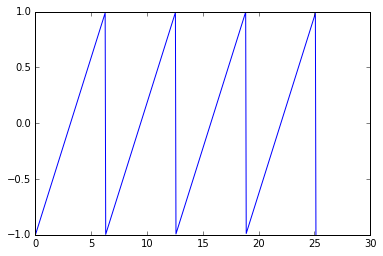

In [2]:
from scipy.signal import sawtooth

T = 8 * np.pi
t = np.linspace(0, T, 512)
x = sawtooth(t)
plt.plot(t, x)


We are going to diffuse the wave by evolving the heat equation:
$$ \frac{\delta x}{\delta t} = \alpha \frac{\delta^2 x}{\delta^2}{t} $$

Which we can discretize for our arrays:
$$
\begin{align}
x_{k} &=&  \frac{1}{4} \left( x_{k-1}[i-1] + 2 x_{k-1}[i] + x_{k-1}[i+1] \right) \\
x_{k}[0] &=&  x_{0}[0] \\
x_{k}[N] &=&  x_{0}[N] \\
\end{align}
$$


Set the number of districtization steps:

In [3]:
steps = 2048

## Python implementation

As a reference implementation, a simple, pure-Python implementation of heat-diffusion

In [4]:
def blur_py(x, steps=1024):
    x = 1 * x # copy
    y = np.empty_like(x)
    y[0] = x[0]
    y[-1] = x[-1]
    for _ in range(steps):
        for i in range(1, len(x)-1):
            y[i] = .25 * ( y[i-1] + 2 * y[i] + y[i+1] )
        x, y = y, x # swap for next step
    return x

Show the results of the pure Python implementation:

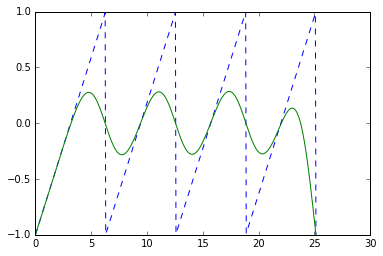

In [5]:
x_blurred = blur_py(x, steps)
plt.plot(t, x, '--')
plt.plot(t, x_blurred)

## Numpy vectorization

Your task is to optimized the blurring function by vectorizing it. Pay special attention to the edge conditions.